#**CREDIT RISK ANALYSIS**
#**END-TO-END SOLUTION**
####**VIX PROGRAM_ID/X Partners - Inka Nurul Alfiana**


---



> **Penjelasan** ***Credit Risk***


*Credit risk* adalah risiko yang harus ditanggung oleh seorang individu atau lembaga ketika memberikan pinjaman (biasanya dalam bentuk uang) ke individu atau pihak lain.

Untuk memperkecil risiko kredit ini, biasanya dilakukan proses yang disebut dengan *credit scoring* dan *credit rating* terhadap pihak peminjam.

*Credit score* adalah nilai risiko yang diberikan kepada seorang individu atau organisasi yang mengajukan pinjaman berdasarkan rekam jejak pinjaman dan pembayaran yang dilakukan. Proses pemberian *credit score* ini biasa disebut dengan *credit scoring*.

Terdapat beberapa model *scoring* yang diterapkan lembaga-lembaga, namun kebanyakan lembaga menggunakan model FICO sebagai standart. Model FICO memiliki rentang penilaian 300-850, dimana semakin tinggi nilai score berarti calon debitur dinilai layak untuk diberi pembiayaan atau pinjaman (karena dianggap mampu mengembalikan pinjaman).

Lembaga juga banyak yang menggunakan *risk rating*. Berbanding terbalik dengan *credit scoring*, semakin tinggi nilai *risk rating* menunjukkan bahwa debitur semakin berisiko.

#**LOADING THE DATA**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loan = pd.read_csv("/content/drive/My Drive/loan_data_2007_2014.csv")
loan.info()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
loan.shape

(466285, 75)

#**PRE-PROCESSING DATA**

In [ ]:
np.sum(loan.isnull())

Unnamed: 0               0
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [ ]:
loan.drop(columns=['all_util','inq_fi','total_cu_tl','inq_last_12m','il_util','open_rv_12m','max_bal_bc','open_rv_24m'
                   ,'open_il_12m','open_il_24m','mths_since_rcnt_il','total_bal_il','open_acc_6m','open_il_6m'
                   ,'verification_status_joint','desc','mths_since_last_delinq','mths_since_last_record'
                   ,'mths_since_last_major_derog','annual_inc_joint','dti_joint','next_pymnt_d','Unnamed: 0']
          ,axis=0,inplace=True)

In [ ]:
loan = loan.drop(columns=['id', 'member_id','funded_amnt', 'funded_amnt_inv'
                          ,'sub_grade','emp_title','issue_d','total_pymnt'
                          , 'total_pymnt_inv', 'total_rec_prncp','out_prncp'
                          , 'out_prncp_inv','zip_code', 'total_rec_prncp'
                          , 'total_rec_int','total_rec_late_fee','last_pymnt_d'
                          , 'last_pymnt_amnt','recoveries'
                          ,'collection_recovery_fee','pymnt_plan','url'
                          ,'initial_list_status','collections_12_mths_ex_med'
                          ,'acc_now_delinq','tot_coll_amt','tot_cur_bal'
                          ,'total_rev_hi_lim']
                 , axis=1)

In [ ]:
loan=loan.dropna(axis=0)

In [ ]:
loan.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
title                  0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
last_credit_pull_d     0
policy_code            0
application_type       0
dtype: int64

In [ ]:
loan.dtypes

loan_amnt                int64
term                    object
int_rate               float64
installment            float64
grade                   object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
title                   object
addr_state              object
dti                    float64
delinq_2yrs            float64
earliest_cr_line        object
inq_last_6mths         float64
open_acc               float64
pub_rec                float64
revol_bal                int64
revol_util             float64
total_acc              float64
last_credit_pull_d      object
policy_code              int64
application_type        object
dtype: object

In [ ]:
loan

,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,policy_code,application_type
0,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,...,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,Jan-16,1,INDIVIDUAL
1,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,...,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,Sep-13,1,INDIVIDUAL
2,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Fully Paid,...,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,Jan-16,1,INDIVIDUAL
3,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Fully Paid,...,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,Jan-15,1,INDIVIDUAL
4,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Current,...,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,Jan-16,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,60 months,14.47,432.64,C,4 years,MORTGAGE,110000.0,Source Verified,Current,...,Apr-03,2.0,18.0,0.0,23208,77.6,36.0,Jan-16,1,INDIVIDUAL
466281,22000,60 months,19.97,582.50,D,10+ years,MORTGAGE,78000.0,Verified,Charged Off,...,Jun-97,5.0,18.0,1.0,18238,46.3,30.0,Jan-16,1,INDIVIDUAL
466282,20700,60 months,16.99,514.34,D,7 years,MORTGAGE,46000.0,Verified,Current,...,Dec-01,2.0,18.0,0.0,6688,51.1,43.0,Dec-15,1,INDIVIDUAL
466283,2000,36 months,7.90,62.59,A,3 years,OWN,83000.0,Verified,Fully Paid,...,Feb-03,1.0,21.0,0.0,11404,21.5,27.0,Apr-15,1,INDIVIDUAL


In [ ]:
loan['loan_status'].value_counts()

Current                                                212422
Fully Paid                                             178228
Charged Off                                             40103
Late (31-120 days)                                       6494
In Grace Period                                          3042
Does not meet the credit policy. Status:Fully Paid       1933
Late (16-30 days)                                        1148
Default                                                   784
Does not meet the credit policy. Status:Charged Off       739
Name: loan_status, dtype: int64

In [ ]:
#status loan yang tidak masuk target
not_target = ['Current','Late (31-120 days)','In Grace Period','Late (16-30 days)','Default','Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Charged Off']

In [ ]:
#mempersempit kategori target
loan = loan[~loan.loan_status.isin(not_target)]
print(loan.shape)
mapping = {'Fully Paid':0,'Does not meet the credit policy. Status:Fully Paid':0,'Charged Off':1,'Does not meet the credit policy. Status:Charged Off':1}
loan['loan_status']= loan['loan_status'].map(mapping)
print(loan['loan_status'].value_counts())

(218331, 25)
0    178228
1     40103
Name: loan_status, dtype: int64


<ipython-input-32-6edc2e1cbf0b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan['loan_status']= loan['loan_status'].map(mapping)


In [ ]:
#mengidentifikasi kolom fitur yang membantu dalam membuat prediksi lebih baik
for column in loan.columns:
  uniq= loan[column].dropna().unique()
  if len(uniq)>=2:
    print(f'multiple unique values {column} {len(uniq)}')
  else:
    loan=loan.drop(columns=column)
    print(f'only one unique value {column} {uniq}')

multiple unique values loan_amnt 1297
multiple unique values term 2
multiple unique values int_rate 483
multiple unique values installment 41515
multiple unique values grade 7
multiple unique values emp_length 11
multiple unique values home_ownership 6
multiple unique values annual_inc 16311
multiple unique values verification_status 3
multiple unique values loan_status 2
multiple unique values purpose 14
multiple unique values title 46319
multiple unique values addr_state 50
multiple unique values dti 3856
multiple unique values delinq_2yrs 22
multiple unique values earliest_cr_line 615
multiple unique values inq_last_6mths 9
multiple unique values open_acc 56
multiple unique values pub_rec 11
multiple unique values revol_bal 45127
multiple unique values revol_util 1180
multiple unique values total_acc 100
multiple unique values last_credit_pull_d 102
only one unique value policy_code [1]
only one unique value application_type ['INDIVIDUAL']




> Berdasarkan hasil diatas dapat diketahui bahwa pada variabel 'policy_code' dan 'application_type' hanya memiliki satu nilai unik sehingga pada pengerjaan selanjutnya kedua variabel tersebut akan dihapus.



In [ ]:
loan.dtypes.value_counts()

object     10
float64    10
int64       3
dtype: int64

In [ ]:
#CONTINIOUS FEATURES
float_df = loan.select_dtypes(include=['float','int'])
float_df

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,10.65,162.87,24000.0,0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0
1,2500,15.27,59.83,30000.0,1,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0
2,2400,15.96,84.33,12252.0,0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0
3,10000,13.49,339.31,49200.0,0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0
5,5000,7.90,156.46,36000.0,0,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,18.25,217.65,37536.0,1,12.28,4.0,0.0,12.0,0.0,5318,10.7,26.0
466277,18000,7.90,563.23,90000.0,1,10.33,1.0,0.0,16.0,0.0,8224,16.3,33.0
466278,10000,18.25,362.78,42000.0,0,11.57,0.0,0.0,9.0,0.0,3196,28.8,24.0
466281,22000,19.97,582.50,78000.0,1,18.45,0.0,5.0,18.0,1.0,18238,46.3,30.0


In [ ]:
#CATEGORICAL FEATURES
object_df = loan.select_dtypes(include=['object'])
object_df

,term,grade,emp_length,home_ownership,verification_status,purpose,title,addr_state,earliest_cr_line,last_credit_pull_d
0,36 months,B,10+ years,RENT,Verified,credit_card,Computer,AZ,Jan-85,Jan-16
1,60 months,C,< 1 year,RENT,Source Verified,car,bike,GA,Apr-99,Sep-13
2,36 months,C,10+ years,RENT,Not Verified,small_business,real estate business,IL,Nov-01,Jan-16
3,36 months,C,10+ years,RENT,Source Verified,other,personel,CA,Feb-96,Jan-15
5,36 months,A,3 years,RENT,Source Verified,wedding,My wedding loan I promise to pay back,AZ,Nov-04,Sep-15
...,...,...,...,...,...,...,...,...,...,...
466276,60 months,D,5 years,MORTGAGE,Verified,medical,Medical expenses,MA,Nov-94,Oct-14
466277,36 months,A,3 years,RENT,Verified,debt_consolidation,my loan,MD,Jul-98,Oct-14
466278,36 months,D,10+ years,RENT,Source Verified,vacation,Vacation,VA,Jun-02,Jan-16
466281,60 months,D,10+ years,MORTGAGE,Verified,debt_consolidation,Debt consolidation,TN,Jun-97,Jan-16


In [ ]:
cols = ['home_ownership', 'verification_status', 'emp_length', 'term', 'addr_state']
for col in cols:
  print(loan[col].value_counts())

MORTGAGE    107888
RENT         92683
OWN          17581
OTHER          136
NONE            42
ANY              1
Name: home_ownership, dtype: int64
Verified           78581
Not Verified       78294
Source Verified    61456
Name: verification_status, dtype: int64
10+ years    67979
2 years      21220
< 1 year     18760
3 years      18413
5 years      16582
1 year       15144
4 years      14676
6 years      13645
7 years      12868
8 years      10530
9 years       8514
Name: emp_length, dtype: int64
 36 months    170890
 60 months     47441
Name: term, dtype: int64
CA    37557
NY    18677
TX    16777
FL    15002
NJ     8507
IL     8087
PA     7310
VA     6933
GA     6933
OH     6628
NC     5872
MA     5468
MD     5211
AZ     5113
WA     5077
MI     4963
CO     4785
MN     3813
MO     3431
CT     3286
NV     3198
OR     2827
AL     2676
WI     2633
LA     2535
SC     2430
IN     2273
TN     1963
KY     1948
OK     1816
KS     1815
UT     1813
AR     1498
HI     1257
NM     1157
NH     10

In [ ]:
loan = loan.drop(columns=["last_credit_pull_d", "earliest_cr_line", "title",'grade', "addr_state"], axis=1)

In [ ]:
mapping_dict = {"10+ years": "experienced","9 years": "experienced"
                ,"8 years": "experienced","7 years": "experienced"
                ,"6 years": "intermediate","5 years": "intermediate"
                ,"4 years": "intermediate","3 years": "beginner"
                ,"2 years": "beginner","1 year": "beginner"
                ,"< 1 year": "beginner","n/a": "beginner"}

In [ ]:
loan['emp_length']= loan['emp_length'].map(mapping_dict)
loan.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc
0,5000,36 months,10.65,162.87,experienced,RENT,24000.0,Verified,0,credit_card,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0
1,2500,60 months,15.27,59.83,beginner,RENT,30000.0,Source Verified,1,car,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0
2,2400,36 months,15.96,84.33,experienced,RENT,12252.0,Not Verified,0,small_business,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0
3,10000,36 months,13.49,339.31,experienced,RENT,49200.0,Source Verified,0,other,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0
5,5000,36 months,7.90,156.46,beginner,RENT,36000.0,Source Verified,0,wedding,11.20,0.0,3.0,9.0,0.0,7963,28.3,12.0


In [ ]:
loan['purpose'].value_counts()

debt_consolidation    127638
credit_card            43580
home_improvement       12564
other                  12161
major_purchase          5472
small_business          4367
car                     3251
medical                 2424
wedding                 1927
moving                  1701
house                   1394
vacation                1304
educational              312
renewable_energy         236
Name: purpose, dtype: int64

In [ ]:
#ONE_HOT ENCODING UNTUK VARIABEL DUMMY
cat_cols= ['home_ownership', 'verification_status', 'purpose', 'term', 'emp_length']
dummy_df = pd.get_dummies(loan[cat_cols])
loan = pd.concat([loan, dummy_df], axis=1)
loan = loan.drop(cat_cols, axis=1)
loan

,loan_amnt,int_rate,installment,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,emp_length_beginner,emp_length_experienced,emp_length_intermediate
0,5000,10.65,162.87,24000.0,0,27.65,0.0,1.0,3.0,0.0,...,0,0,0,0,0,1,0,0,1,0
1,2500,15.27,59.83,30000.0,1,1.00,0.0,5.0,3.0,0.0,...,0,0,0,0,0,0,1,1,0,0
2,2400,15.96,84.33,12252.0,0,8.72,0.0,2.0,2.0,0.0,...,0,0,1,0,0,1,0,0,1,0
3,10000,13.49,339.31,49200.0,0,20.00,0.0,1.0,10.0,0.0,...,1,0,0,0,0,1,0,0,1,0
5,5000,7.90,156.46,36000.0,0,11.20,0.0,3.0,9.0,0.0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,8525,18.25,217.65,37536.0,1,12.28,4.0,0.0,12.0,0.0,...,0,0,0,0,0,0,1,0,0,1
466277,18000,7.90,563.23,90000.0,1,10.33,1.0,0.0,16.0,0.0,...,0,0,0,0,0,1,0,1,0,0
466278,10000,18.25,362.78,42000.0,0,11.57,0.0,0.0,9.0,0.0,...,0,0,0,1,0,1,0,0,1,0
466281,22000,19.97,582.50,78000.0,1,18.45,0.0,5.0,18.0,1.0,...,0,0,0,0,0,0,1,0,1,0


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218331 entries, 0 to 466283
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            218331 non-null  int64  
 1   int_rate                             218331 non-null  float64
 2   installment                          218331 non-null  float64
 3   annual_inc                           218331 non-null  float64
 4   loan_status                          218331 non-null  int64  
 5   dti                                  218331 non-null  float64
 6   delinq_2yrs                          218331 non-null  float64
 7   inq_last_6mths                       218331 non-null  float64
 8   open_acc                             218331 non-null  float64
 9   pub_rec                              218331 non-null  float64
 10  revol_bal                            218331 non-null  int64  
 11  revol_util   

In [ ]:
features = loan.drop(columns=['loan_status'],axis=1)
target = loan['loan_status']

#**SETTING UP MODEL EVALUATION CRITERIA**

In [ ]:
def model_performance(target, predictions):
  fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=False, sharey=False,figsize=[16,4])
  ax1.bar(x=target.value_counts().index.astype(str), height=target.value_counts().to_list(), data=target, color=['b','r'])

  metric = metrics.confusion_matrix(target,predictions)
  confusion_dataframe = pd.DataFrame(data=metric, index=['Actual_Positive','Actual_Negative'], columns=['Guessed_Positive', 'Guessed_Negative'])
  sns.heatmap(confusion_dataframe, annot=True, fmt="d", cmap="YlGnBu", ax = ax2)

  fpr, tpr, _ = (metrics.roc_curve(target,predictions))
  plt.plot(fpr, tpr)
  

  fpr, tpr, _ = (metrics.roc_curve(target,predictions))
  ax3.plot(fpr, tpr)
  roc_auc = auc(fpr, tpr)
  ax3.plot([0, 1], [0, 1], 'k--', label='AUC = %0.3f'% roc_auc)
  ax3.legend(loc='lower right')
  ax3.plot([0,1],[0,1],'r--')
  ax3.set_xlim([-0.1,1.0])
  ax3.set_ylim([-0.1,1.01])
  ax3.set_ylabel('True Positive Rate')
  ax3.set_xlabel('False Positive Rate')
  plt.tight_layout()
  print(f'Area Under the Curve: {round(roc_auc,2)}')


    
  plt.show()

In [ ]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_val_predict
import pandas as pd 
from sklearn.feature_selection import RFECV
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
import warnings
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.manifold import TSNE
warnings.filterwarnings("ignore")
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import anderson
from sklearn.model_selection import train_test_split
from scipy.stats import mannwhitneyu
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.pipeline import make_pipeline
from sklearn import preprocessing

#**LOGISTIC REGRESSION WITH VANILLA, BALANCED WEIGHT AND CUSTOM PENALTY**

In [ ]:
lr=LogisticRegression()

In [ ]:
predictions = cross_val_predict(lr, features, target, cv=3)

Area Under the Curve: 0.5


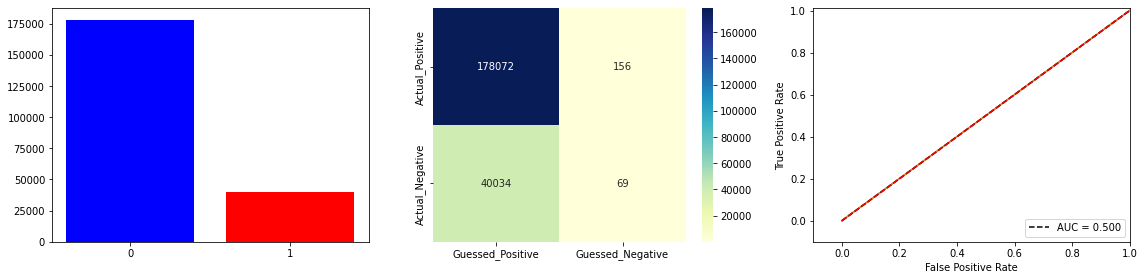

In [ ]:
model_performance(target, predictions)



> Berdasarkan hasil *heatmap* dapat dihasilkan nilai akurasi sebesar 0.82.


Area Under the Curve: 0.61


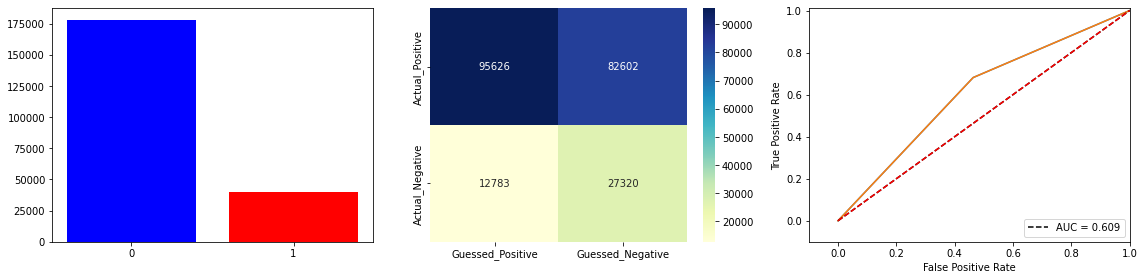


Duration: 20 seconds


In [ ]:
start_time = time.time()
lr_weight = LogisticRegression(class_weight="balanced")
predictions_weight_balanced = cross_val_predict(lr_weight, features, target, cv=3)
model_performance(target, predictions_weight_balanced)



> Berdasarkan hasil *heatmap* dapat dihasilkan nilai akurasi sebesar 0.56.


Area Under the Curve: 0.54


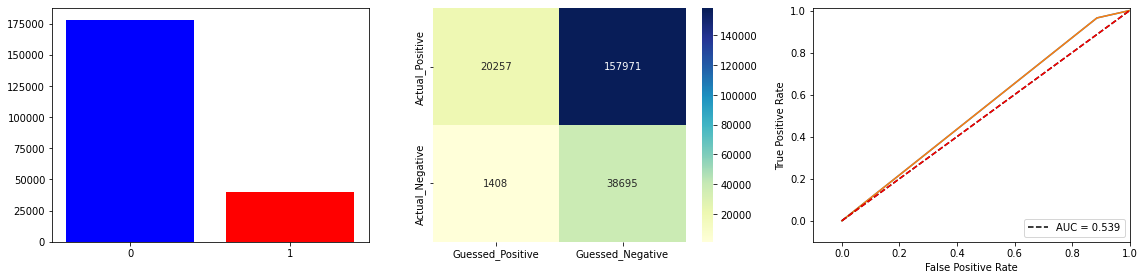


Duration: 11 seconds


In [ ]:
start_time = time.time()
penalty= {1:10,0:1}
lr_weightp = LogisticRegression(class_weight=penalty)
predictionsp = cross_val_predict(lr_weightp, features, target, cv=3)
model_performance(target, predictionsp)



> Berdasarkan hasil *heatmap* dapat dihasilkan nilai akurasi sebesar 0.27.



#**LOGISTIC REGRESSION WITH SMOTE OVER SAMPLING**

Area Under the Curve: 0.61


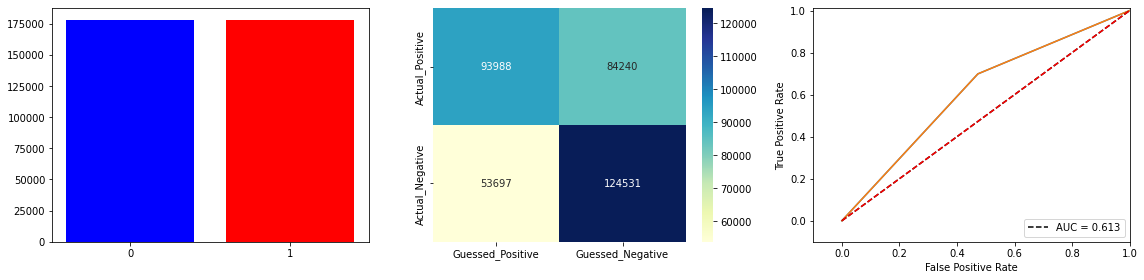


Duration: 57 seconds


In [ ]:
start_time = time.time()
smote = SMOTE(sampling_strategy='minority')
features_sm, target_sm = smote.fit_resample(features, target)
predictions_sm = cross_val_predict(lr, features_sm, target_sm, cv=3)
model_performance(pd.Series(target_sm), pd.Series(predictions_sm))



> Berdasarkan hasil *heatmap* dapat dihasilkan nilai akurasi sebesar 0.61.



#**SCALING AND NORMALIZING THE DATA**

In [ ]:
def normalize(subset):
   continious_columns = subset.select_dtypes(include=['float']).columns
   mm_scaler = preprocessing.MinMaxScaler()
   for col in continious_columns:
     subset[col]= mm_scaler.fit_transform(subset[[col]])
   return subset

In [ ]:
lr = LogisticRegression()
scaled_loan = normalize(loan)
features_scaled = scaled_loan.drop(columns=['loan_status'],axis=1)
target_scaled = scaled_loan['loan_status']

Area Under the Curve: 0.51


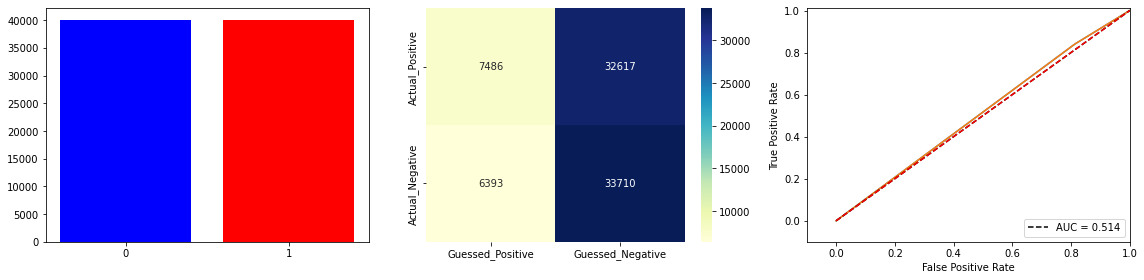

In [ ]:
rus = RandomUnderSampler(random_state=0)
rus.fit(features_scaled, target_scaled)
features_sc, target_sc = rus.fit_resample(features_scaled, target_scaled)
predictions_sc = cross_val_predict(lr, features_sc, target_sc, cv=3)
model_performance(pd.Series(target_sc), pd.Series(predictions_sc))



> Berdasarkan hasil *heatmap* dapat dihasilkan nilai akurasi sebesar 0.51.



#**XGBOOST CLASSIFIER**

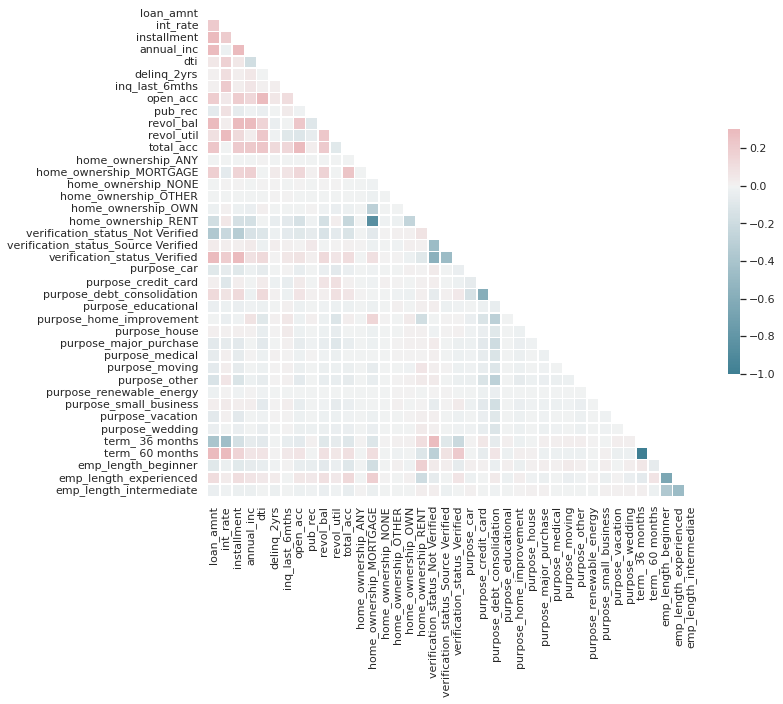

In [ ]:
def plot_correlation_heatmap(df):
    corr = df.corr()
    sns.set(style="white")
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(11, 9))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)


    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.show()
plot_correlation_heatmap(features)

In [ ]:
features.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'term_ 36 months',
       'term_ 60 months', 'emp_length_beginner', 'emp_length_experienced',
       'emp_length_intermediate'],
      dtype='object')

In [ ]:
features_corr = features.drop(columns=['home_ownership_RENT','term_ 60 months','home_ownership_NONE', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],axis=1)

In [ ]:
print(features_corr.shape)
print(target.shape)

(218331, 23)
(218331,)


In [ ]:
start_time = time.time()
smote = SMOTE(sampling_strategy='minority')
features_c, target_c = smote.fit_resample(features_corr, target)
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed


Duration: 34 seconds


In [ ]:
import xgboost as xgb
X_train, X_test, Y_train, Y_test = train_test_split(features_c, target_c, test_size=0.33)
model = xgb.XGBClassifier()
param_dist = {"max_depth": [3,5],
              "min_child_weight" : [3,6],
              "n_estimators": [100],
              "learning_rate": [0.05,.16],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1, scoring="f1")
grid_search.fit(X_train, Y_train)

grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits


XGBClassifier(learning_rate=0.16, max_depth=5, min_child_weight=6)

#**XGBOOST HYPERPARAMETER**

In [ ]:
import time
start_time = time.time()
model = xgb.XGBClassifier(learning_rate=0.01, max_depth=7, n_estimators=100,  gamma=5,colsample_bytree=.6, subsample=0.8, scoring = 'f1',scale_pos_weight=1)
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed


Duration: 0 seconds


In [ ]:
eval_set = [(X_train, Y_train), (X_test, Y_test)]
eval_metric = ["auc","error"]
model.fit(X_train,Y_train, verbose=True, eval_metric=eval_metric, eval_set=eval_set)

[0]	validation_0-auc:0.84895	validation_0-error:0.220031	validation_1-auc:0.845891	validation_1-error:0.219593
[1]	validation_0-auc:0.882885	validation_0-error:0.196734	validation_1-auc:0.881163	validation_1-error:0.195952
[2]	validation_0-auc:0.885445	validation_0-error:0.19794	validation_1-auc:0.88477	validation_1-error:0.19732
[3]	validation_0-auc:0.887258	validation_0-error:0.195469	validation_1-auc:0.887053	validation_1-error:0.194575
[4]	validation_0-auc:0.888972	validation_0-error:0.193384	validation_1-auc:0.888766	validation_1-error:0.19205
[5]	validation_0-auc:0.892886	validation_0-error:0.186672	validation_1-auc:0.892715	validation_1-error:0.185759
[6]	validation_0-auc:0.894295	validation_0-error:0.185215	validation_1-auc:0.894343	validation_1-error:0.183829
[7]	validation_0-auc:0.894118	validation_0-error:0.1863	validation_1-auc:0.894313	validation_1-error:0.184322
[8]	validation_0-auc:0.899044	validation_0-error:0.179047	validation_1-auc:0.899358	validation_1-error:0.177666

XGBClassifier(colsample_bytree=0.6, gamma=5, learning_rate=0.01, max_depth=7,
              scoring='f1', subsample=0.8)

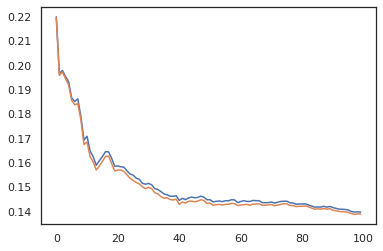

In [ ]:
error_train = model.evals_result()['validation_0']['error']
error_test =  model.evals_result()['validation_1']['error']
plt.plot(range(len(error_train)), error_train)
plt.plot(range(len(error_test)), error_test)

Area Under the Curve: 0.86


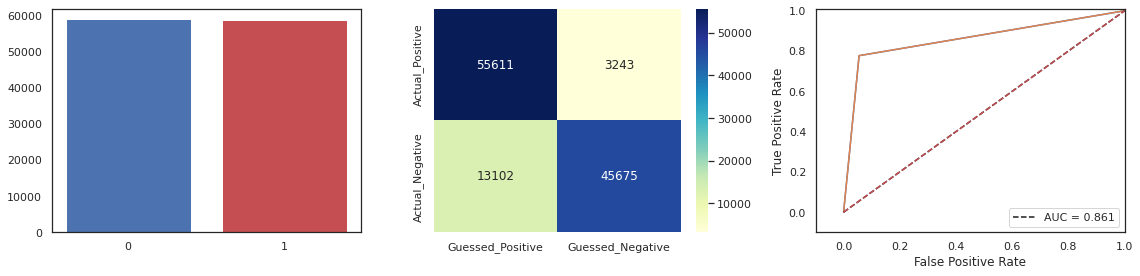

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     58854
           1       0.93      0.78      0.85     58777

    accuracy                           0.86    117631
   macro avg       0.87      0.86      0.86    117631
weighted avg       0.87      0.86      0.86    117631

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.6, 'gamma': 5, 'learning_rate': 0.01, 'max_delta_step': 0, 'max_depth': 7, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'subsample': 0.8, 'verbosity': 1, 'scoring': 'f1'}
[0.00286386 0.01973104 0.00221777 0.0031311  0.00260425 0.00648333
 0.06412143 0.00362531 0.00875498 0.00066115 0.00228613 0.00134454
 0.         0.09236241 0.         0.01939618 0.02827432 0.04202707
 0.04392069 0.5449724  0.03539453 0.03498552 0.04084186]
Preci

In [ ]:
predictions = model.predict(X_test)
model_performance(pd.Series(Y_test), pd.Series(predictions))
print(metrics.classification_report(Y_test,predictions))
print(model.get_xgb_params())
print(model.feature_importances_)
print("Precision = {}".format(precision_score(Y_test, predictions, average='macro')))
print("Recall = {}".format(recall_score(Y_test, predictions, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, predictions)))
print(metrics.confusion_matrix(Y_test, predictions))

term_ 36 months                        0.544972
home_ownership_MORTGAGE                0.092362
inq_last_6mths                         0.064121
verification_status_Verified           0.043921
verification_status_Source Verified    0.042027
emp_length_intermediate                0.040842
emp_length_beginner                    0.035395
emp_length_experienced                 0.034986
verification_status_Not Verified       0.028274
int_rate                               0.019731
home_ownership_OWN                     0.019396
pub_rec                                0.008755
delinq_2yrs                            0.006483
open_acc                               0.003625
annual_inc                             0.003131
loan_amnt                              0.002864
dti                                    0.002604
revol_util                             0.002286
installment                            0.002218
total_acc                              0.001345
revol_bal                              0

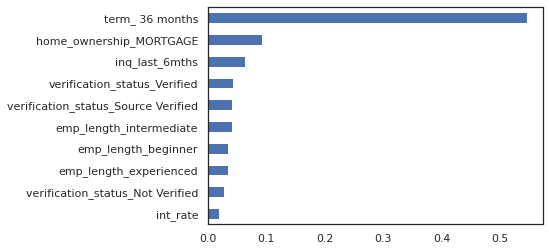

In [ ]:
coefficients = model.feature_importances_
feature_importance = pd.Series(coefficients,
                            index=features_corr.columns, )

feature_importance_ordered = feature_importance.abs().sort_values(ascending=False)
print(feature_importance_ordered )
feature_importance_ordered[0:10].sort_values().plot.barh()
plt.show()

#**MAX VOTING**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
start_time = time.time()
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression(class_weight='balanced')

model1.fit(X_train,Y_train)
model2.fit(X_train,Y_train)
model3.fit(X_train,Y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed


Duration: 631 seconds


#**DECISION TREE CLASSIFIER**

Area Under the Curve: 0.81


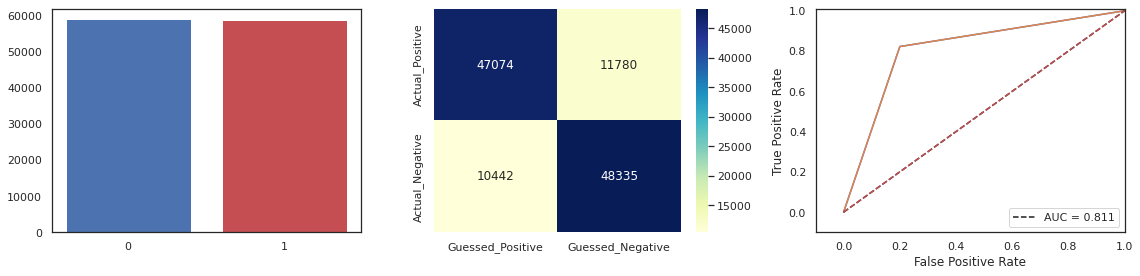

In [ ]:
model_performance(pd.Series(Y_test), pd.Series(pred1))

> Berdasarkan hasil *heatmap* dapat dihasilkan nilai akurasi sebesar 0.81.

#**K-NEIGHBOURS CLASSIFIER**

Area Under the Curve: 0.71


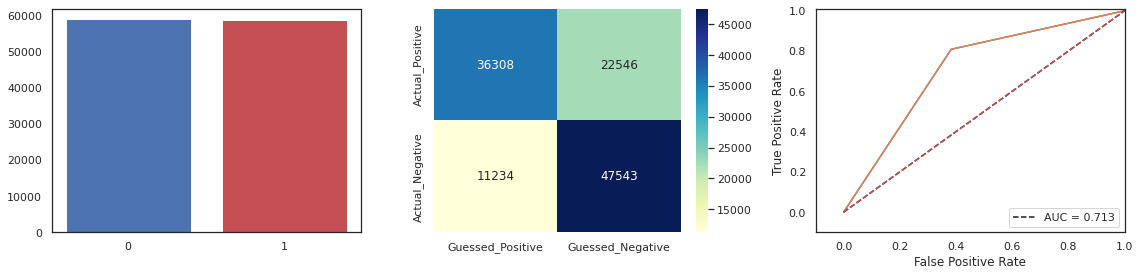

In [ ]:
model_performance(pd.Series(Y_test), pd.Series(pred2))

> Berdasarkan hasil *heatmap* dapat dihasilkan nilai akurasi sebesar 0.71.

#**LOGISTIC REGRESSION**

Area Under the Curve: 0.6


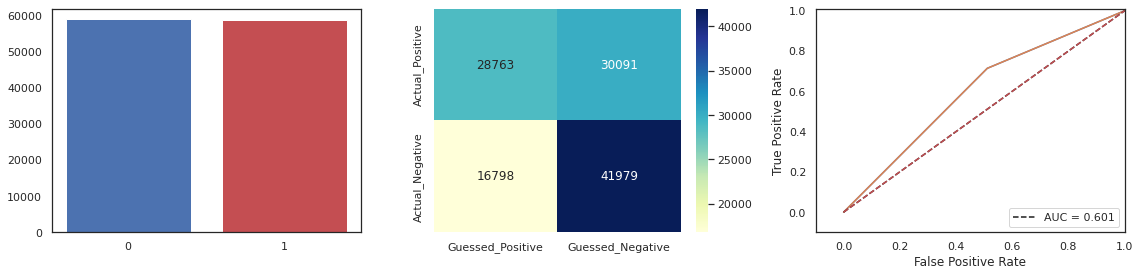

In [ ]:
model_performance(pd.Series(Y_test), pd.Series(pred3))

> Berdasarkan hasil *heatmap* dapat dihasilkan nilai akurasi sebesar 0.6.

In [ ]:
import statistics as s

#**MAX VOTING ENSEMBLING TECHNIQUE**

In [ ]:
final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, s.mode([pred1[i], pred2[i], pred3[i]]))

Area Under the Curve: 0.77


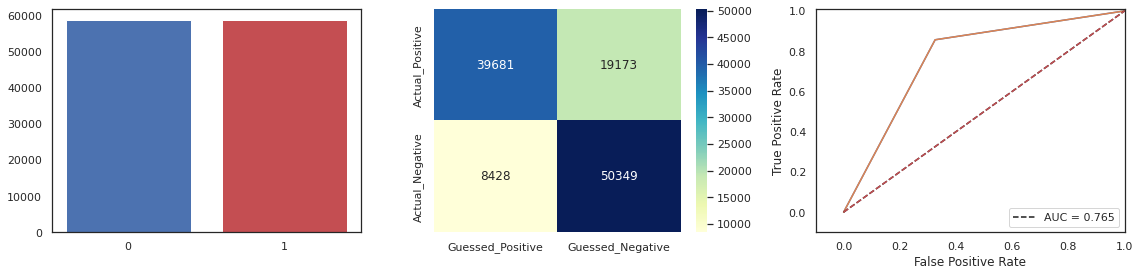

Recall = 0.7654191644967252


In [ ]:
model_performance(pd.Series(Y_test), pd.Series(final_pred))
print("Recall = {}".format(recall_score(Y_test, final_pred, average='macro')))

> Berdasarkan hasil *heatmap* dapat dihasilkan nilai akurasi sebesar 0.77.

Area Under the Curve: 0.76


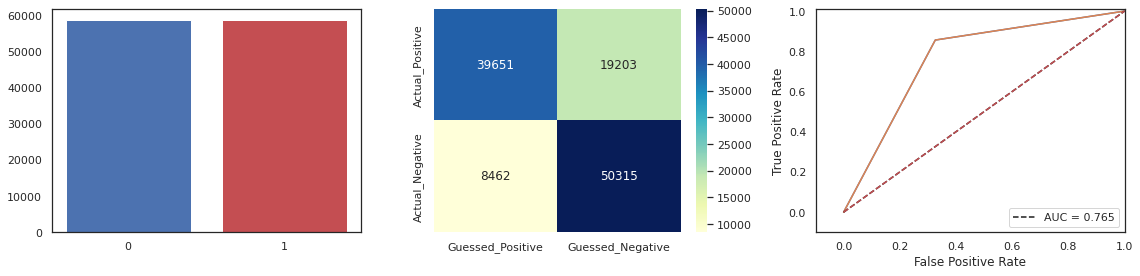

Recall = 0.7648750677383731


In [ ]:
from sklearn.ensemble import VotingClassifier
model_vc = VotingClassifier(estimators=[('lr', model3), ('dt', model1), ('knn',model2 )], voting='hard')
model_vc.fit(X_train,Y_train)
pred_vc=model_vc.predict(X_test)
model_performance(pd.Series(Y_test), pd.Series(pred_vc))
print("Recall = {}".format(recall_score(Y_test, pred_vc, average='macro')))

> Berdasarkan hasil *heatmap* dapat dihasilkan nilai akurasi sebesar 0.76.